In [3]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
import os

file_path = '/content/drive/MyDrive/Colab Notebooks/CNN_assignment.zip'
print("File Size:", os.path.getsize(file_path), "bytes")


File Size: 823790659 bytes


In [5]:

zip_file_path = '/content/drive/MyDrive/Colab Notebooks/CNN_assignment.zip'


if zipfile.is_zipfile(zip_file_path):
    print("The file is a valid zip archive.")
else:
    print("The file is not a valid zip archive.")


The file is a valid zip archive.


# New Section

1. Data Reading & Understanding
Data Source: The dataset consists of 2357 images categorized into 9 different skin conditions:
Actinic keratosis
Basal cell carcinoma
Dermatofibroma
Melanoma
Nevus
Pigmented benign keratosis
Seborrheic keratosis
Squamous cell carcinoma
Vascular lesion
Key Task:
Read the data, define paths for the training and testing images, and inspect the image metadata.
Ensure proper file structure to load the images correctly in the TensorFlow pipeline.
2. Dataset Creation
Train-Validation Split:
Divide the dataset into training and validation datasets.
Use a batch size of 32 and resize the images to a uniform size of 180x180.
Utilize TensorFlow’s ImageDataGenerator for loading images and performing data augmentation if needed later.

In [6]:


base_dir = '/content/melanoma_datasets'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(base_dir)
    print("Extraction completed.")


Extraction completed.


In [9]:
# List the contents of the base directory
contents = os.listdir(base_dir)

# Iterate over the items in the base directory
for item in contents:
    # Create the full path for each item
    list_sub_dir = os.path.join(base_dir, item)

    # Check if the item is a directory
    if os.path.isdir(list_sub_dir):
        print(f"Contents of {list_sub_dir}:")

    train_dir=os.path.join(list_sub_dir,'Train')
    test_dir=os.path.join(list_sub_dir,'Test')


print(os.listdir(train_dir))
print(os.listdir(test_dir))

Contents of /content/melanoma_datasets/Skin cancer ISIC The International Skin Imaging Collaboration:
['squamous cell carcinoma', 'actinic keratosis', 'pigmented benign keratosis', 'vascular lesion', 'nevus', 'basal cell carcinoma', 'melanoma', 'dermatofibroma', 'seborrheic keratosis']
['squamous cell carcinoma', 'actinic keratosis', 'pigmented benign keratosis', 'vascular lesion', 'nevus', 'basal cell carcinoma', 'melanoma', 'dermatofibroma', 'seborrheic keratosis']


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255,   # Normalize pixel values between 0 and 1
    validation_split=0.2  # Create a validation split
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_data = datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1795 images belonging to 9 classes.
Found 21 images belonging to 9 classes.


3. Dataset Visualization
Visualize one image instance from each of the 9 classes to understand the data better.
Plot a grid of 3x3 images, each representing one of the disease classes.

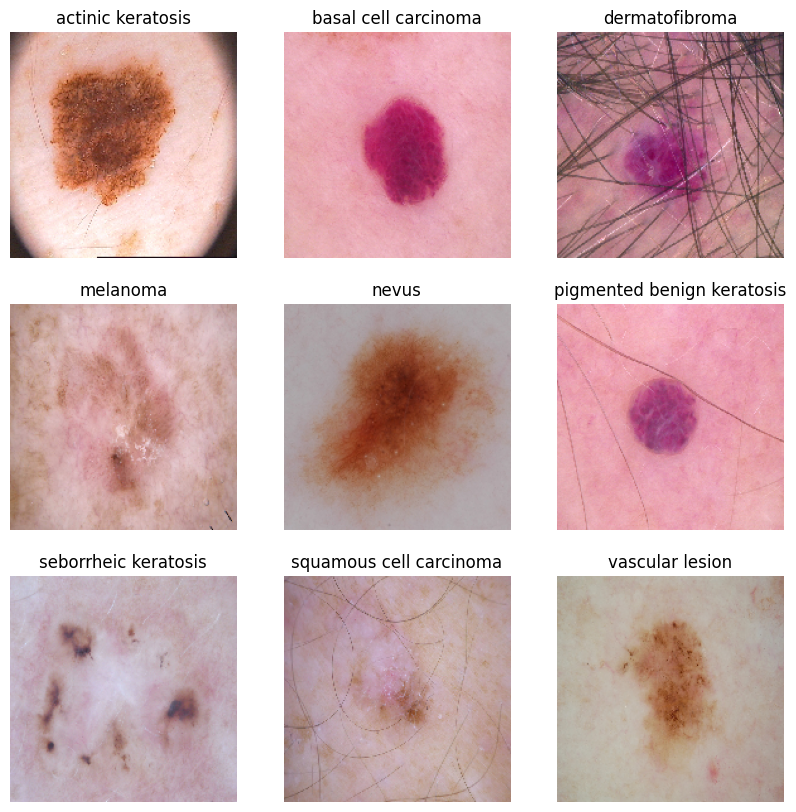

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizing samples of each class
classes = list(train_data.class_indices.keys())
fig, ax = plt.subplots(3, 3, figsize=(10,10))
for i, class_name in enumerate(classes):
    img, label = next(train_data)
    ax[i//3, i%3].imshow(img[0])
    ax[i//3, i%3].set_title(class_name)
    ax[i//3, i%3].axis('off')
plt.show()


4. Initial Model Building & Training
CNN Architecture:
Build a custom CNN model with layers such as Conv2D, MaxPooling2D, Dense, Dropout, and Flatten. Normalize pixel values between (0, 1).
Example structure:
Input: 180x180x3
Conv2D → MaxPooling2D → Conv2D → MaxPooling2D → Flatten → Dense (output layer with 9 units for multiclass classification)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # 9 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_data, validation_data=validation_data, epochs=20)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.2069 - loss: 2.7729 - val_accuracy: 0.1429 - val_loss: 2.2383
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.3601 - loss: 1.8200 - val_accuracy: 0.2381 - val_loss: 2.6688
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.4008 - loss: 1.6644 - val_accuracy: 0.3333 - val_loss: 2.5640
Epoch 4/20


Training: Train the model for 20 epochs using categorical cross-entropy as the loss function and an appropriate optimizer like Adam.
Findings: After training, assess if there's overfitting or underfitting by comparing the training and validation accuracy/loss.
5. Data Augmentation to Resolve Underfitting/Overfitting
If the model is overfitting (i.e., the training accuracy is high, but validation accuracy is low), introduce data augmentation to increase image diversity and improve generalization.
Data Augmentation Techniques: Apply transformations such as rotation, zoom, flip, and shear.

In [ ]:
aug_train_data = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


6. Model Building & Training on Augmented Data
Retrain the CNN model with the augmented data.
Compare the performance of this model with the earlier one to see if overfitting/underfitting issues are resolved.

In [ ]:
class_counts = train_data.class_indices
